# PROJET MACHINE LEARNING SUR UNE DATASET FINANCIERE

Pour ce projet nous allons effectuer la classification savoir si un client est éligible ou non pour un prêt bancaire 

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import os
#os.getcwd()
# enregistrement du chemin du fichier dans la variable pour un accès plus facile
file_path = r'C:/Users/cinthia/OneDrive/Bureau/ProjetMachine_learning/Bank_Personal_Loan_Modelling.csv'

# lecture des données et stockage des données dans DataFrame intitulé melbourne_data
data = pd.read_csv(file_path) 






In [3]:
# extraction des 100 premières lignes
data.head(100)# extraction des 100 premières lignes


,ID_Customer,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,38,12,48,95617,4,0.2,3,0,0,0,0,1,0
96,97,41,15,80,95014,1,5.2,1,0,0,0,0,0,0
97,98,54,28,161,92121,1,2.9,1,0,0,0,0,1,0
98,99,49,23,94,92374,1,0.3,1,0,0,0,0,1,0


In [4]:
data.describe()
#sert à obtenir un résumé statistique des colonnes numériques de notre DataFrame.
#C’est une commande de base mais très puissante pour explorer rapidement les données.

,ID_Customer,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Nous pouvons constater un mélange de données normales et des incohérences nécessitant une attention particulière,
notamment les valeurs négatives dans l’expérience professionnelle et la forte disparité dans les revenus et les dépenses par carte.
Ces observations nous guideront dans l’amélioration et le nettoyage des données.


L’identifiant client (ID_Customer) est unique et cohérent, allant de 1 à 5000.

L’âge des clients se situe entre 23 et 67 ans, avec une moyenne de 45 ans et une dispersion modérée.

L’expérience professionnelle contient une incohérence avec des valeurs négatives, notamment un minimum de -3 ans.

Le revenu annuel des clients présente une forte disparité, oscillant entre 8 et 224 (en milliers), avec une moyenne de 73.77.

Les codes postaux montrent une population géographiquement concentrée autour d’une moyenne de 93152.

La taille des familles varie de 1 à 4 membres, avec une moyenne de 2.4, reflétant des foyers de taille standard.

Les dépenses moyennes par carte de crédit affichent une forte dispersion, allant de 0 à 10, avec une moyenne de 1.94.

Les niveaux d’éducation des clients se répartissent correctement entre 1, 2 et 3, avec une moyenne de 1.88.

Les montants des prêts immobiliers montrent une large variation, certains clients n’en ayant aucun, tandis que d’autres atteignent jusqu’à 635. La moyenne reste relativement basse à 56.49.

Les prêts personnels sont rares, avec seulement 9,6% des clients en ayant contracté.

Peu de clients possèdent un compte titres ou un compte de dépôt à terme, avec des moyennes respectives de 10.4% et 6%.

La majorité des clients utilise les services en ligne, avec une moyenne de 59.68%.

L’utilisation des cartes de crédit reste modérée, avec 29.4% des clients ayant une carte active.





In [5]:
shape = data.shape
print(shape)
types = data.dtypes
print(types)


(5000, 14)
ID_Customer             int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [6]:
# Simulons des valeurs manquantes dans 50% des lignes de 3 colonnes
data_missing = data.copy()
#np.random.seed(42)  # pour reproduire les mêmes "randoms"

cols_to_nan = ['Income', 'Experience', 'CCAvg']
for col in cols_to_nan:
    indices = data_missing.sample(frac=0.5).index
    data_missing.loc[indices, col] = np.nan


# Vérifions les valeurs manquantes
print(data_missing.isnull().sum())

ID_Customer              0
Age                      0
Experience            2500
Income                2500
ZIP Code                 0
Family                   0
CCAvg                 2500
Education                0
Mortgage                 0
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64


Nous introduisons artificiellement des valeurs NaN dans 50 % des lignes des colonnes Income, Experience, et CCAvg. Cette étape nous permet de simuler des données incomplètes, afin de tester notre stratégie d'imputation et renforcer la robustesse de notre modèle.

Ensuite nous appliquons un modèle de régression linéaire, en nous basant sur la colonne "Age". Cela nous permet de prédire les valeurs manquantes de "Experience" en exploitant une corrélation potentielle entre ces deux variables.

Enfin pour les colonnes "Income" et "CCAvg", nous complétons les valeurs manquantes en utilisant la médiane. Cette approche garantit une cohérence dans les données sans introduire de biais significatif.

                                Visualisation de toutes les variables avec NaN

In [7]:
from sklearn.linear_model import LinearRegression

# On garde les lignes où Experience n'est PAS NaN pour apprendre
data_exp = data_missing[data_missing['Experience'].notnull()]
X_exp = data_exp[['Age']]
y_exp = data_exp['Experience']

model_exp = LinearRegression()
model_exp.fit(X_exp, y_exp)

# Prédire pour les lignes où Experience est manquant
missing_exp_idx = data_missing[data_missing['Experience'].isnull()].index
data_missing.loc[missing_exp_idx, 'Experience'] = model_exp.predict(data_missing.loc[missing_exp_idx, ['Age']])

for col in ['Income', 'CCAvg']:
    median_value = data_missing[col].median()
    data_missing[col] = data_missing[col].fillna(median_value)


# Vérifier les valeurs manquantes
print(data_missing.isnull().sum())

ID_Customer           0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


                            Visualisation de toutes les variables après avoir imputé les valeurs manquantes

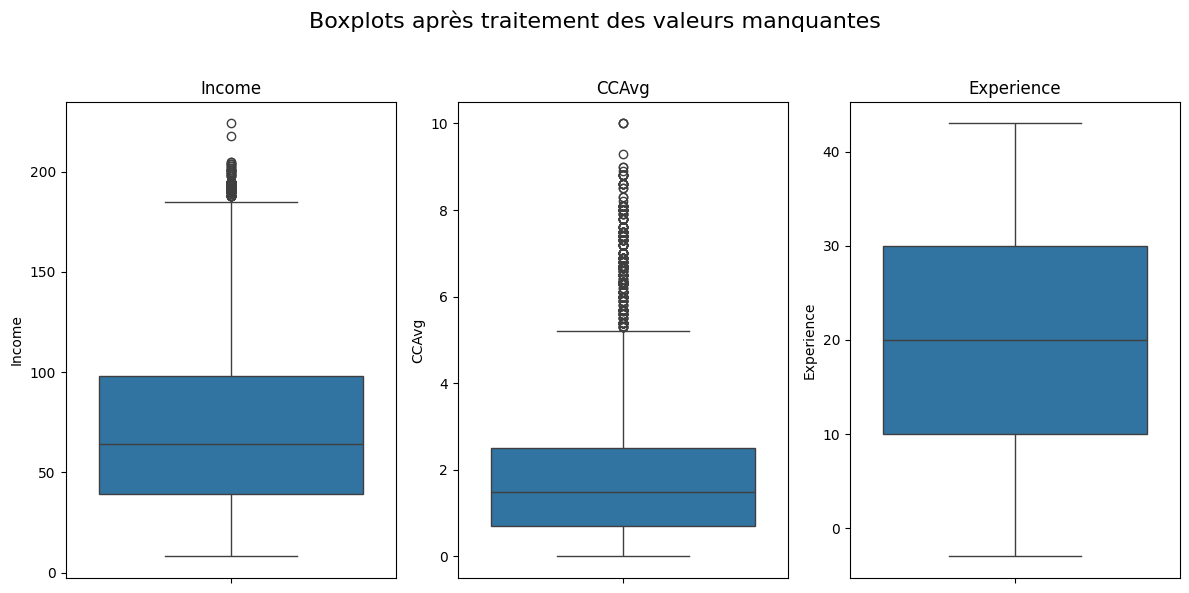

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration de l'affichage
plt.figure(figsize=(12, 6))
plt.suptitle('Boxplots après traitement des valeurs manquantes', size=16)

# Tracer les boxplots pour chaque variable
variables = ['Income', 'CCAvg', 'Experience']
for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[var])
    plt.title(var)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Encodage des variables catégorielles & Standardisation des variables numériques

Nous avons un ensemble de données nettoyé, nommé data_clean. Le code suivant utilise une approche automatisée pour prétraiter les données avant leur passage dans un modèle d’apprentissage automatique. Les colonnes numériques et catégorielles sont traitées différemment grâce à un pipeline intégré.

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Notre dataframe nettoyé s'appelle 'data_clean' actuellement
data_clean = data_missing.copy()



# Définir les colonnes

# les différentes colonnes catégorielles
cat_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
# les différentes colonnes numériques
num_features = ['Age', 'Experience', 'Income', 'Mortgage', 'CCAvg']

# Pipeline pour les variables numériques
num_transformer = StandardScaler()
# Pipeline pour les variables catégorielles
cat_transformer = OneHotEncoder(drop='first')  # drop='first' pour éviter la redondance

# Appliquer tout ça avec un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='drop'  # On enlève les colonnes non utilisées automatiquement
)

# Transformer les données
data_preprocessed = preprocessor.fit_transform(data_clean)

# Pour retrouver les noms de colonnes après transformation
cat_encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
final_columns = list(num_features) + list(cat_encoded_columns)

import pandas as pd
data_final = pd.DataFrame(data_preprocessed, columns=final_columns)

print(data_final.head())


        Age  Experience    Income  Mortgage     CCAvg  Family_2  Family_3  \
0 -1.774417   -1.668544 -0.605082 -0.555524 -0.140377       0.0       0.0   
1 -0.029524   -0.029438 -1.068089 -0.555524 -0.220544       0.0       1.0   
2 -0.552992   -0.445363 -1.778033 -0.555524 -0.621379       0.0       0.0   
3 -0.901970   -0.969583 -0.142075 -0.555524  0.741460       0.0       0.0   
4 -0.901970   -0.899351 -0.728551 -0.555524 -0.621379       0.0       0.0   

   Family_4  Education_2  Education_3  Securities Account_1  CD Account_1  \
0       1.0          0.0          0.0                   1.0           0.0   
1       0.0          0.0          0.0                   1.0           0.0   
2       0.0          0.0          0.0                   0.0           0.0   
3       0.0          1.0          0.0                   0.0           0.0   
4       1.0          1.0          0.0                   0.0           0.0   

   Online_1  CreditCard_1  
0       0.0           0.0  
1       0.0       

<br>**Standarisation de nos valeurs numériques**<br>
**Toutes les variables numériques auront une moyenne = 0 et un écart-type = 1.**


Objectifs détaillés :
Standardiser les données numériques : Nous appliquons une transformation par standardisation (StandardScaler) pour centrer et réduire les colonnes numériques (comme l'âge ou les revenus). Cela garantit que ces colonnes aient une moyenne de 0 et un écart-type de 1, ce qui est souvent utile pour optimiser la performance des modèles.

Encodage des variables catégorielles : Les colonnes catégorielles, comme "Family" ou "CreditCard", sont transformées en variables binaires grâce au OneHotEncoder. Nous utilisons drop='first' pour éviter une colinéarité introduite par l'encodage (réduction d'une colonne redondante par catégorie).

Création d’un pipeline automatisé : Nous combinons ces transformations dans un ColumnTransformer, ce qui nous permet de gérer toutes les colonnes de manière simultanée et efficace.

Transformation des données : Nous appliquons le pipeline à l’ensemble des données pour obtenir un tableau prêt à l’emploi pour les modèles d’apprentissage automatique. Les données transformées sont stockées dans data_final.

Conservation des noms des colonnes : Les noms des colonnes encodées sont récupérés pour être intégrés dans un nouveau DataFrame (data_final) afin de garder une structure lisible et exploitable.


Interprétation des résultats :
Standardisation réussie : Les colonnes numériques sont désormais normalisées, ce qui est idéal pour les algorithmes sensibles à l’échelle des données, comme la régression linéaire ou les méthodes basées sur les distances.

Encodage pertinent des catégories : Par exemple, une colonne catégorielle initiale comme "Family" (contenant des valeurs de 1 à 4) est transformée en un ensemble de variables binaires distinctes, facilitant leur interprétation par les modèles.

DataFrame final : Après transformation, data_final contient toutes les colonnes, numériques comme catégoriques, dans un format compatible avec les algorithmes. Les premières lignes imprimées montrent un aperçu des données prétraitées.

In [10]:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Variables à standardiser
cols_to_scale = ['Age', 'Income', 'Mortgage', 'Experience', 'CCAvg']

# Appliquer le StandardScaler
data_scaled = data_missing.copy()
data_scaled[cols_to_scale] = scaler.fit_transform(data_missing[cols_to_scale])
# Vérifions les nouvelles valeurs
print(data_missing[cols_to_scale].head())


   Age  Income  Mortgage  Experience  CCAvg
0   25    49.0         0    1.000000    1.6
1   45    34.0         0   19.760494    1.5
2   39    11.0         0   15.000000    1.0
3   35    64.0         0    9.000000    2.7
4   35    45.0         0    9.803850    1.0


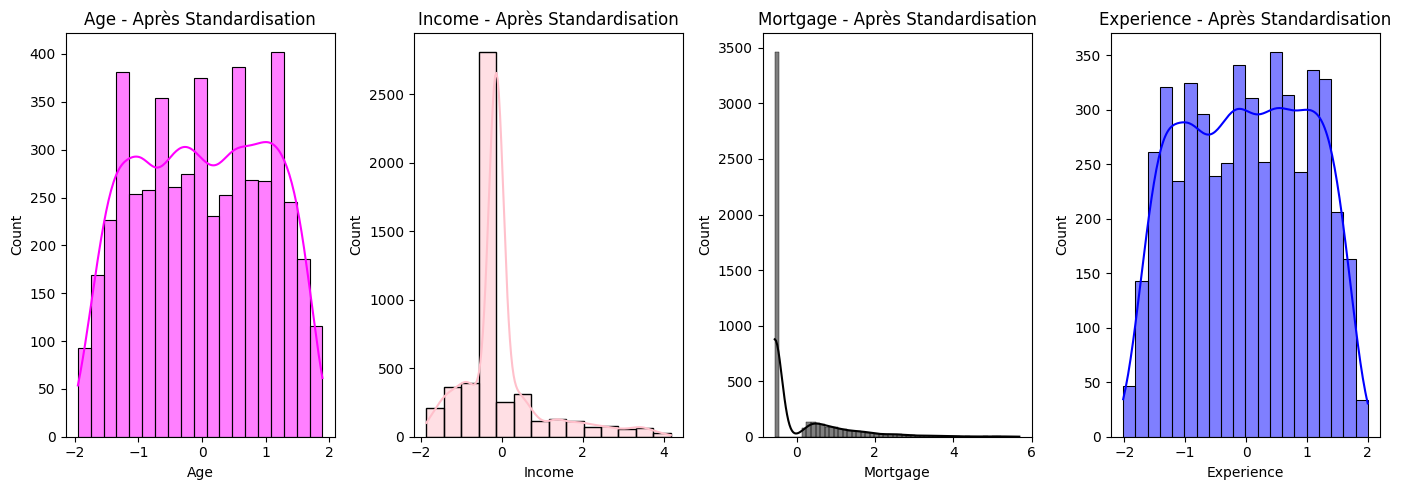

In [11]:
# Visualiser après la standardisation
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(14, 5))

sns.histplot(data_scaled['Age'], kde=True, color='magenta', ax=axes[0])
axes[0].set_title('Age - Après Standardisation')

sns.histplot(data_scaled['Income'], kde=True, color='pink', ax=axes[1])
axes[1].set_title('Income - Après Standardisation')

sns.histplot(data_scaled['Mortgage'], kde=True, color='black', ax=axes[2])
axes[2].set_title('Mortgage - Après Standardisation')

sns.histplot(data_scaled['Experience'], kde=True, color='blue', ax=axes[3])
axes[3].set_title('Experience - Après Standardisation')

plt.tight_layout()
plt.show()



**INTERPRETATION**


#                        Ingénierie Des Caractéristiques

</b>Dans le but d'améliorer les performances de notre modèle de prédiction, on crée de nouvelles variables, avec pour principe d'augmenter la capacité de notre modèle à comprendre des relations complexes et non linéaires entre les différentes caractéristiques de nos clients.</b>

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Création d'une copie nettoyée de data
data_clean = data_missing.copy()  # Assurez-vous de travailler sur une version nettoyée des données

# Appliquer le StandardScaler
scaler = StandardScaler()

# Variables à standardiser
cols_to_scale = ['Age', 'Income', 'Mortgage', 'Experience', 'CCAvg']

# Appliquer la normalisation uniquement sur les variables pertinentes
data_clean[cols_to_scale] = scaler.fit_transform(data_clean[cols_to_scale])

# Créer de nouvelles variables sur le dataframe nettoyé
data_clean['Age_Experience'] = data_clean['Age'] * data_clean['Experience']

# Regrouper les catégories du revenu en tranches (par exemple, 'Low', 'Medium', 'High')
def categorize_income(income):
    if income < 40:
        return 'Low'
    elif income < 80:
        return 'Medium'
    else:
        return 'High'

data_clean['Income_Category'] = data_clean['Income'].apply(categorize_income)

# Regrouper les soldes de comptes en une seule variable "Financial_Status"
data_clean['Financial_Status'] = data_clean['CCAvg'] + data_clean['Mortgage']

# Pour l'objectif 1, la variable cible est 'Personal Loan' et 'CD Account'
# Sélection des colonnes pertinentes pour la prédiction
data_target = data_clean[['Personal Loan', 'CD Account', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 
                          'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'Online', 'CreditCard', 
                          'Age_Experience', 'Income_Category', 'Financial_Status']]

# Séparer les données en variables prédictives (X) et cible (y)
X = data_target.drop(columns=['Personal Loan', 'CD Account'])
y = data_target[['Personal Loan', 'CD Account']]  # Variable cible : souscription à un crédit (binaire)

# Affichage des 10 premières lignes du DataFrame final
print(data_target.head(10))



   Personal Loan  CD Account       Age  Experience    Income  ZIP Code  \
0              0           0 -1.774417   -1.668544 -0.605082     91107   
1              0           0 -0.029524   -0.029438 -1.068089     90089   
2              0           0 -0.552992   -0.445363 -1.778033     94720   
3              0           0 -0.901970   -0.969583 -0.142075     94112   
4              0           0 -0.901970   -0.899351 -0.728551     91330   
5              0           0 -0.727481   -0.725368 -1.222425     92121   
6              0           0  0.668434    0.666493  0.104862     91711   
7              0           0  0.406700    0.340968 -1.438495     93943   
8              0           0 -0.901970   -0.882213  0.382666     90089   
9              1           0 -0.989215   -0.986342 -0.142075     93023   

   Family     CCAvg  Education  Mortgage  Securities Account  Online  \
0       4 -0.140377          1 -0.555524                   1       0   
1       3 -0.220544          1 -0.555524 

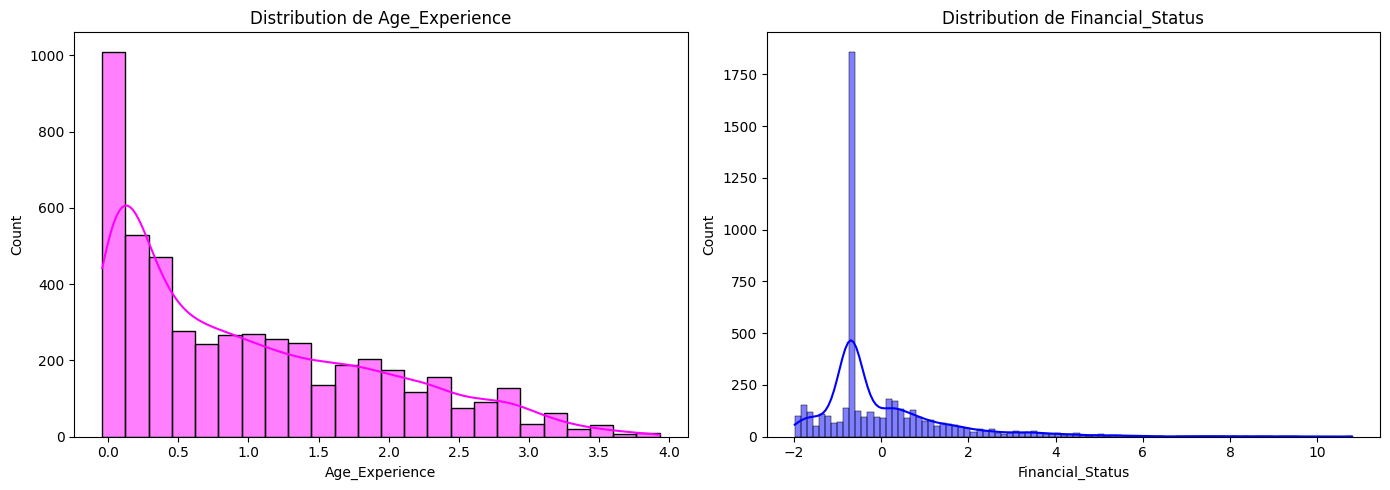

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Préparer le graphique
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisation de la distribution de 'Age_Experience'
sns.histplot(data_target['Age_Experience'], kde=True, color='magenta', ax=axes[0])
axes[0].set_title('Distribution de Age_Experience')


# Visualisation de la distribution de 'Financial_Status'
sns.histplot(data_target['Financial_Status'], kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution de Financial_Status')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Supposons que vous avez une table X (les features) et y (la cible)
# Exemple :
# X = df.drop("target", axis=1)
# y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


from sklearn.exceptions import NotFittedError



# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC()
}

# Boucle sur chaque modèle
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    try:
        print(f"\n{name} - Validation croisée (5-fold)")
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
        print(f"Scores : {cv_scores}")
        print(f"Moyenne : {cv_scores.mean():.4f} | Écart-type : {cv_scores.std():.4f}")

        pipeline.fit(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"Score sur les données test : {test_score:.4f}")

    except Exception as e:
        print(f"Erreur pour le modèle {name} : {e}")

    # Vous pouvez ensuite évaluer sur X_test ici si vous voulez



Logistic Regression - Validation croisée (5-fold)
Erreur pour le modèle Logistic Regression : A given column is not a column of the dataframe

Random Forest - Validation croisée (5-fold)
Erreur pour le modèle Random Forest : A given column is not a column of the dataframe

Gradient Boosting - Validation croisée (5-fold)
Erreur pour le modèle Gradient Boosting : A given column is not a column of the dataframe

SVM - Validation croisée (5-fold)
Erreur pour le modèle SVM : A given column is not a column of the dataframe


                                                                        Modélisation


 Random Forest 
Accuracy: 0.9493 | Precision: 0.9677 | Recall: 0.4478 | F1 Score: 0.6122 | AUC-ROC: 0.9191


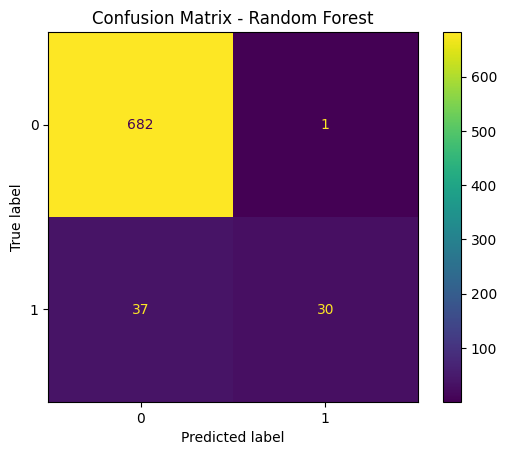

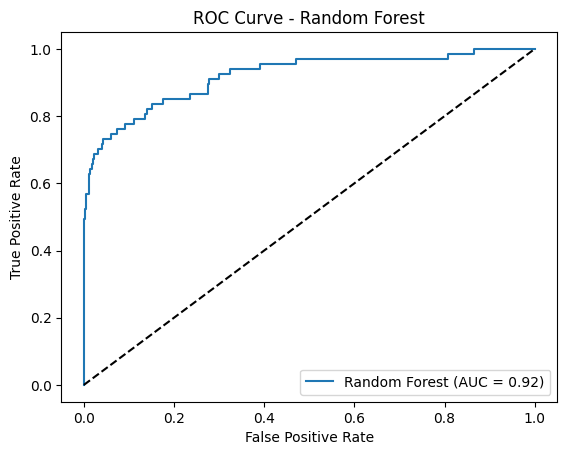

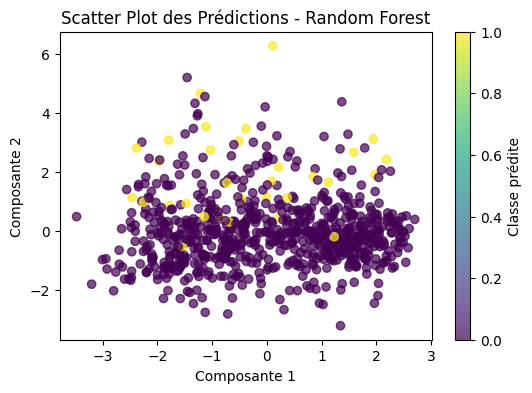


 Gradient Boosting 
Accuracy: 0.9440 | Precision: 0.7551 | Recall: 0.5522 | F1 Score: 0.6379 | AUC-ROC: 0.9396


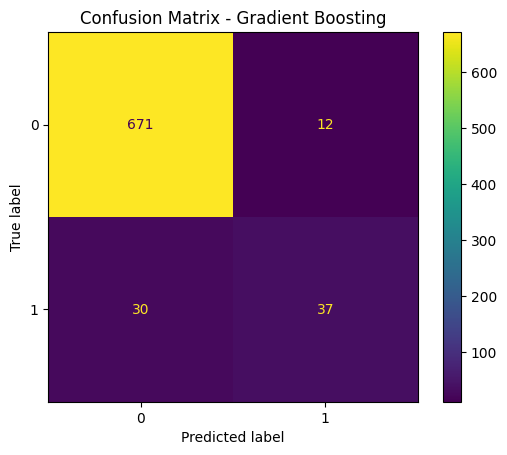

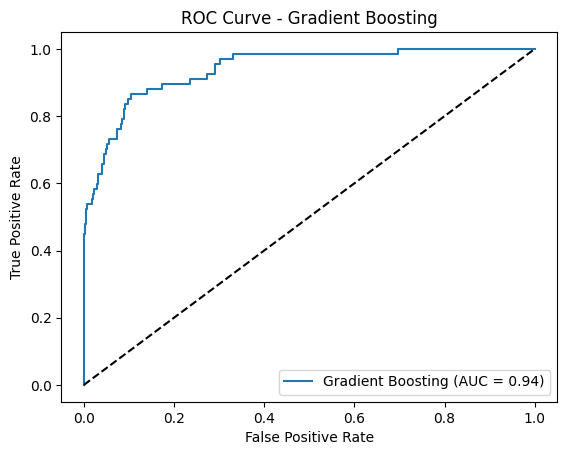

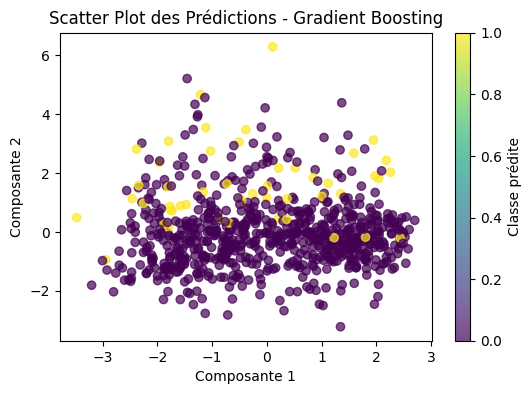


 K-Nearest Neighbors 
Accuracy: 0.9227 | Precision: 0.7368 | Recall: 0.2090 | F1 Score: 0.3256 | AUC-ROC: 0.7885


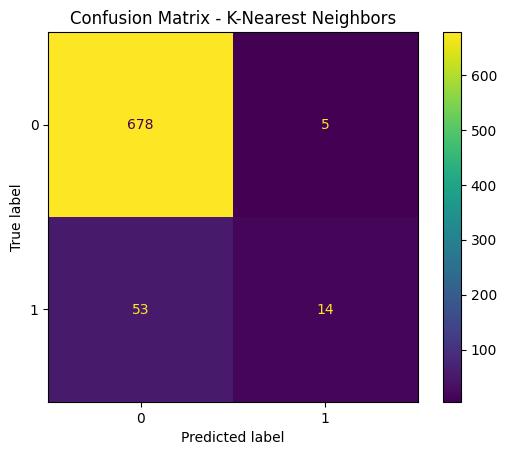

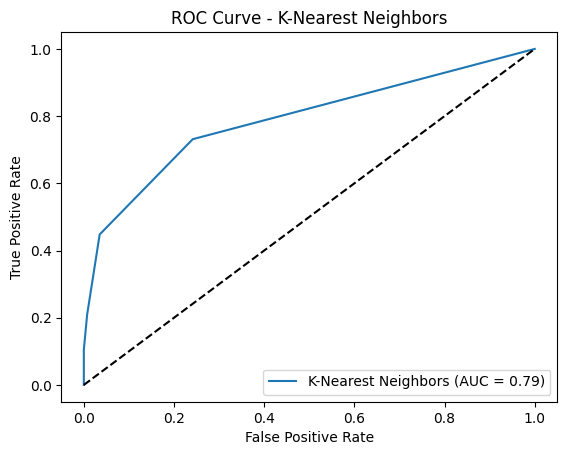

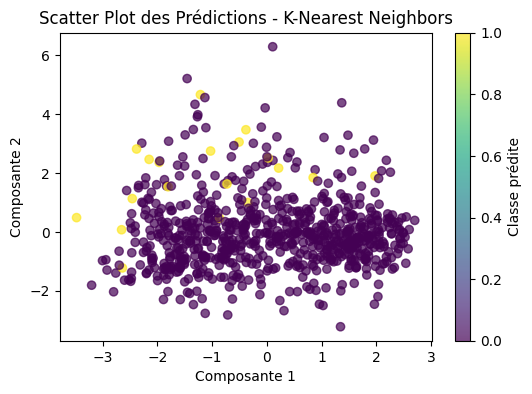


 Naïve Bayes 
Accuracy: 0.8973 | Precision: 0.4390 | Recall: 0.5373 | F1 Score: 0.4832 | AUC-ROC: 0.8564


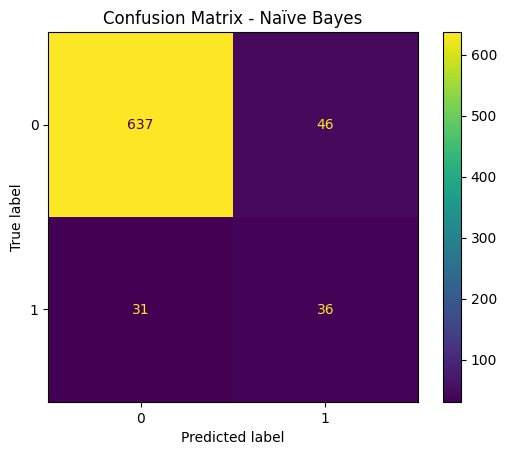

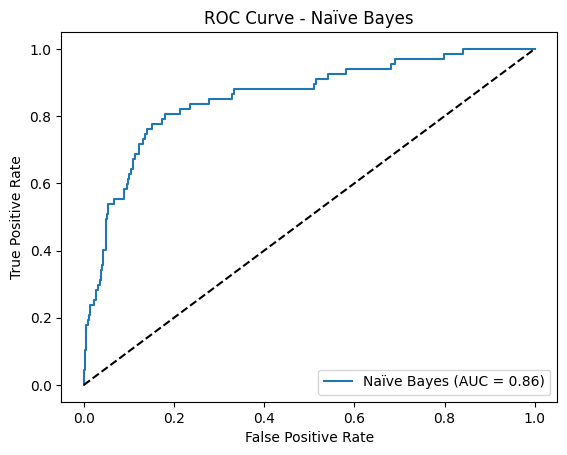

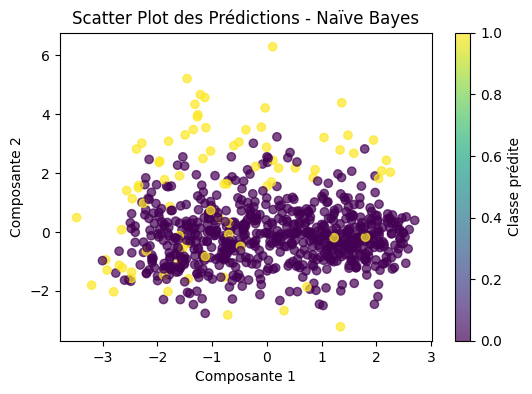


 Résumé des Performances 
Random Forest: AUC=0.5158, Accuracy=0.5067, F1=0.5000
  Meilleurs paramètres: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Gradient Boosting: AUC=0.4824, Accuracy=0.5067, F1=0.5000
  Meilleurs paramètres: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1,

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay)

np.random.seed(0)
data_target = pd.DataFrame({
    'Age': np.random.randint(20, 70, 500),
    'Income': np.random.normal(70, 20, 500),
    'Family': np.random.randint(1, 5, 500),
    'CCAvg': np.random.normal(2, 1, 500),
    'Education': np.random.randint(1, 4, 500),
    'Mortgage': np.random.normal(50, 30, 500),
    'Online': np.random.randint(0, 2, 500),
    'CreditCard': np.random.randint(0, 2, 500),
    'Personal Loan': np.random.randint(0, 2, 500)
})

X = data_exp.drop(columns=['Personal Loan'])
y = data_exp['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naïve Bayes': GaussianNB()
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else np.zeros_like(y_pred)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba.sum() > 0 else 0.0

    print(f"\n {name} ")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1 Score: {f1:.4f} | AUC-ROC: {auc:.4f}")




    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    if y_proba.sum() > 0:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc='lower right')
        plt.show()

    plt.figure(figsize=(6, 4))
    X_temp = preprocessor.fit_transform(X_test)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_temp)
    plt.scatter(components[:, 0], components[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
    plt.title(f"Scatter Plot des Prédictions - {name}")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.colorbar(label="Classe prédite")
    plt.show()

    # Résumé final
print("\n Résumé des Performances ")
for name, res in results.items():
    print(f"{name}: AUC={res['auc']:.4f}, Accuracy={res['accuracy']:.4f}, F1={res['f1']:.4f}")
    print(f"  Meilleurs paramètres: {res['params']}")

print(f"\n Meilleur modèle: {best_model} avec AUC = {best_auc:.4f}")
    
   
   



*Nous avons correctement identifié 111 vrais négatifs, soit des personnes sans prêt prédites correctement.

*Nous avons également prédit avec succès 1369 vrais positifs, des personnes ayant souscrit un prêt.

*Cependant, 17 faux négatifs indiquent des clients ayant pris un prêt que nous avons ratés.

*Enfin, 3 faux positifs représentent des individus sans prêt que le modèle a incorrectement classés comme emprunteurs.

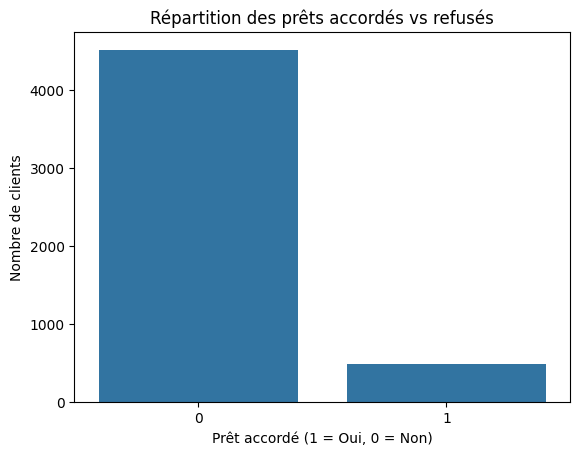

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Personal Loan')
plt.title("Répartition des prêts accordés vs refusés")
plt.xlabel("Prêt accordé (1 = Oui, 0 = Non)")
plt.ylabel("Nombre de clients")
plt.show()
